In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-volcanic-eruptions-ingv-oe/sample_submission.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/train.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/473253715.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/698018079.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/1102809614.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/1087681649.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/1939361933.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/1612001071.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/1995599794.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/470147329.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/1757905171.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/854148244.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/1964692006.csv
/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/1372148138.csv
/kaggle/input/predict-volcanic-eruptions-ingv-

In [2]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from tqdm import tqdm

file_list = []
file_list_train = []
file_list_test = []


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_list.append(os.path.join(dirname, filename))
        
PATH = '/kaggle/input/predict-volcanic-eruptions-ingv-oe/'

for dirname, _, filenames in os.walk('/kaggle/input/predict-volcanic-eruptions-ingv-oe/train'):
    for filename in filenames:
        file_list_train.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/predict-volcanic-eruptions-ingv-oe/test'):
    for filename in filenames:
        file_list_test.append(os.path.join(dirname, filename))

Segment_id - the number of the segment that is known to be shown by the sensors. Time_to_eruption - hour before eruption

In [3]:
print(file_list[0])


print(pd.read_csv(file_list[0]))
print(pd.read_csv(file_list[0]).isna().sum())

/kaggle/input/predict-volcanic-eruptions-ingv-oe/sample_submission.csv
      segment_id  time_to_eruption
0     1000213997                 0
1      100023368                 0
2     1000488999                 0
3     1001028887                 0
4     1001857862                 0
...          ...               ...
4515   996704281                 0
4516   997630809                 0
4517   998072137                 0
4518   998136924                 0
4519    99975682                 0

[4520 rows x 2 columns]
segment_id          0
time_to_eruption    0
dtype: int64


Folder train to remove files with indications of sensor readings


Ten lengths of magazines from ten different sensors, spread around the volcano


In [4]:
print(file_list_train[0])
print(pd.read_csv(file_list_train[0]))

/kaggle/input/predict-volcanic-eruptions-ingv-oe/train/800654756.csv
       sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0        -560.0    -508.0       NaN    -261.0    -348.0    1681.0    -764.0   
1        -508.0    -460.0       NaN    -276.0    -252.0    1934.0    -774.0   
2        -630.0    -260.0       NaN    -310.0    -174.0    2229.0    -785.0   
3        -587.0       1.0       NaN    -352.0     -69.0    2069.0    -788.0   
4        -778.0     240.0       NaN    -390.0      71.0    1850.0    -825.0   
...         ...       ...       ...       ...       ...       ...       ...   
59996     232.0    -151.0       NaN    -192.0     126.0   -1189.0    -578.0   
59997     154.0    -119.0       NaN    -230.0     105.0    -942.0    -766.0   
59998     376.0     -67.0       NaN    -285.0      25.0    -747.0    -958.0   
59999     289.0     -97.0       NaN    -348.0      -3.0    -302.0    -984.0   
60000     222.0     -70.0       NaN    -369.0     -44.0     23

In [5]:
print(file_list[1])
print(pd.read_csv(file_list[1]))

/kaggle/input/predict-volcanic-eruptions-ingv-oe/train.csv
      segment_id  time_to_eruption
0     1136037770          12262005
1     1969647810          32739612
2     1895879680          14965999
3     2068207140          26469720
4      192955606          31072429
...          ...               ...
4426   873340274          15695097
4427  1297437712          35659379
4428   694853998          31206935
4429  1886987043           9598270
4430  1100632800          20128938

[4431 rows x 2 columns]


Folder test to set the value of the sensor in the ale already without a valid value for the hour before the departure

In [6]:
print(file_list_test[0])
print(pd.read_csv(file_list_test[0]))

/kaggle/input/predict-volcanic-eruptions-ingv-oe/test/473253715.csv
       sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0        -511.0       NaN    -131.0    -457.0      47.0     -35.0     185.0   
1        -556.0       NaN    -105.0    -534.0      -7.0     -84.0     190.0   
2        -615.0       NaN     -97.0    -473.0     -50.0       8.0     219.0   
3        -682.0       NaN     -75.0    -388.0     -58.0      28.0     255.0   
4        -763.0       NaN     -18.0    -358.0     -53.0    -104.0     271.0   
...         ...       ...       ...       ...       ...       ...       ...   
59996    -580.0       NaN     -95.0    -614.0     -75.0     198.0     127.0   
59997    -546.0       NaN     -88.0    -843.0     -48.0      82.0      53.0   
59998    -522.0       NaN    -147.0   -1006.0     -33.0     175.0     -27.0   
59999    -516.0       NaN    -129.0   -1085.0       0.0     235.0     -94.0   
60000    -493.0       NaN    -174.0   -1172.0      63.0     123

In [7]:
print(len(file_list_test)) 
keys = list(pd.read_csv(file_list_test[0]).keys()) 
print(keys)
nanC = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for index in range(len(file_list_test)):
    if(index % 200 == 0): 
        print(index)
    df = pd.read_csv(file_list_test[index]) 
    for key in df.keys():
        if df[key].isna().sum() == len(pd.read_csv(file_list_train[0])):            
            nanC[keys.index(key)] += 1

print(nanC)
data={'sensors': keys, 'count': nanC}
NaNDF = pd.DataFrame(data)
print(NaNDF)

4520
['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10']
0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
[387, 1257, 434, 0, 1388, 0, 34, 294, 817, 760]
     sensors  count
0   sensor_1    387
1   sensor_2   1257
2   sensor_3    434
3   sensor_4      0
4   sensor_5   1388
5   sensor_6      0
6   sensor_7     34
7   sensor_8    294
8   sensor_9    817
9  sensor_10    760


<AxesSubplot:xlabel='sensors'>

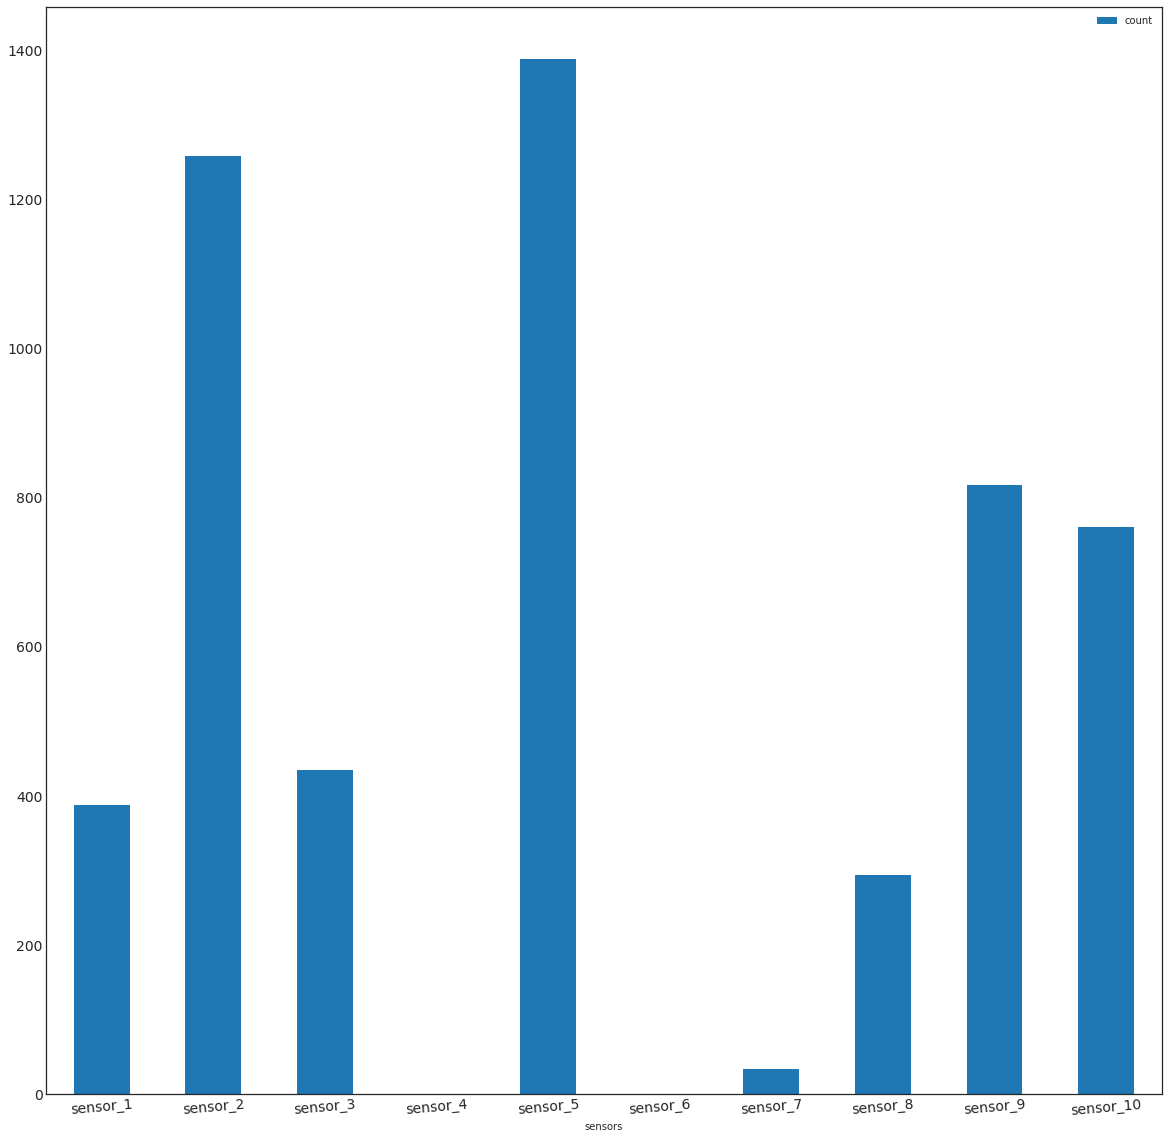

In [8]:
NaNDF.plot(figsize =(20, 20), x="sensors", y="count", kind="bar",  rot=5, fontsize=14 )


Number of files in the test set

In [9]:
print(len(file_list_test))

4520



Number of files in the test set

In [10]:
print(len(file_list_train))

4431


Rechecking existing files with the same name in sets for training and training

In [11]:
files_train = [file.split('/')[-1].split('.')[-2] for file in file_list_train]
files_test = [file.split('/')[-1].split('.')[-2] for file in file_list_test]


First 10 training files

In [12]:
print(files_train[0:10])

['800654756', '321543978', '1417547769', '729870090', '830695026', '1804779174', '2146132452', '1027307874', '846647124', '1973467302']


In [13]:
print(files_test[0:10])

['473253715', '698018079', '1102809614', '1087681649', '1939361933', '1612001071', '1995599794', '470147329', '1757905171', '854148244']


Number of reprints in file indexes

In [14]:
test_set = set(files_test)
train_set = set(files_train)
inter = test_set.intersection(train_set)

print(inter)

set()


For the rest of the work, we read this training at the Data Frame

In [15]:
train = pd.read_csv(PATH+'train.csv')


Hourly chart.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_to_eruption', ylabel='Density'>

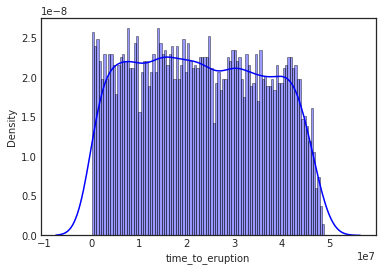

In [16]:
sns.distplot(train['time_to_eruption'],
            hist=True,
            kde=True,
            bins=100,
            color='blue',
            hist_kws={'edgecolor':'black'})

Opisova statistics signs of the hour

In [17]:
train['time_to_eruption'].describe()

count    4.431000e+03
mean     2.284891e+07
std      1.348439e+07
min      6.250000e+03
25%      1.127016e+07
50%      2.246559e+07
75%      3.434356e+07
max      4.904609e+07
Name: time_to_eruption, dtype: float64

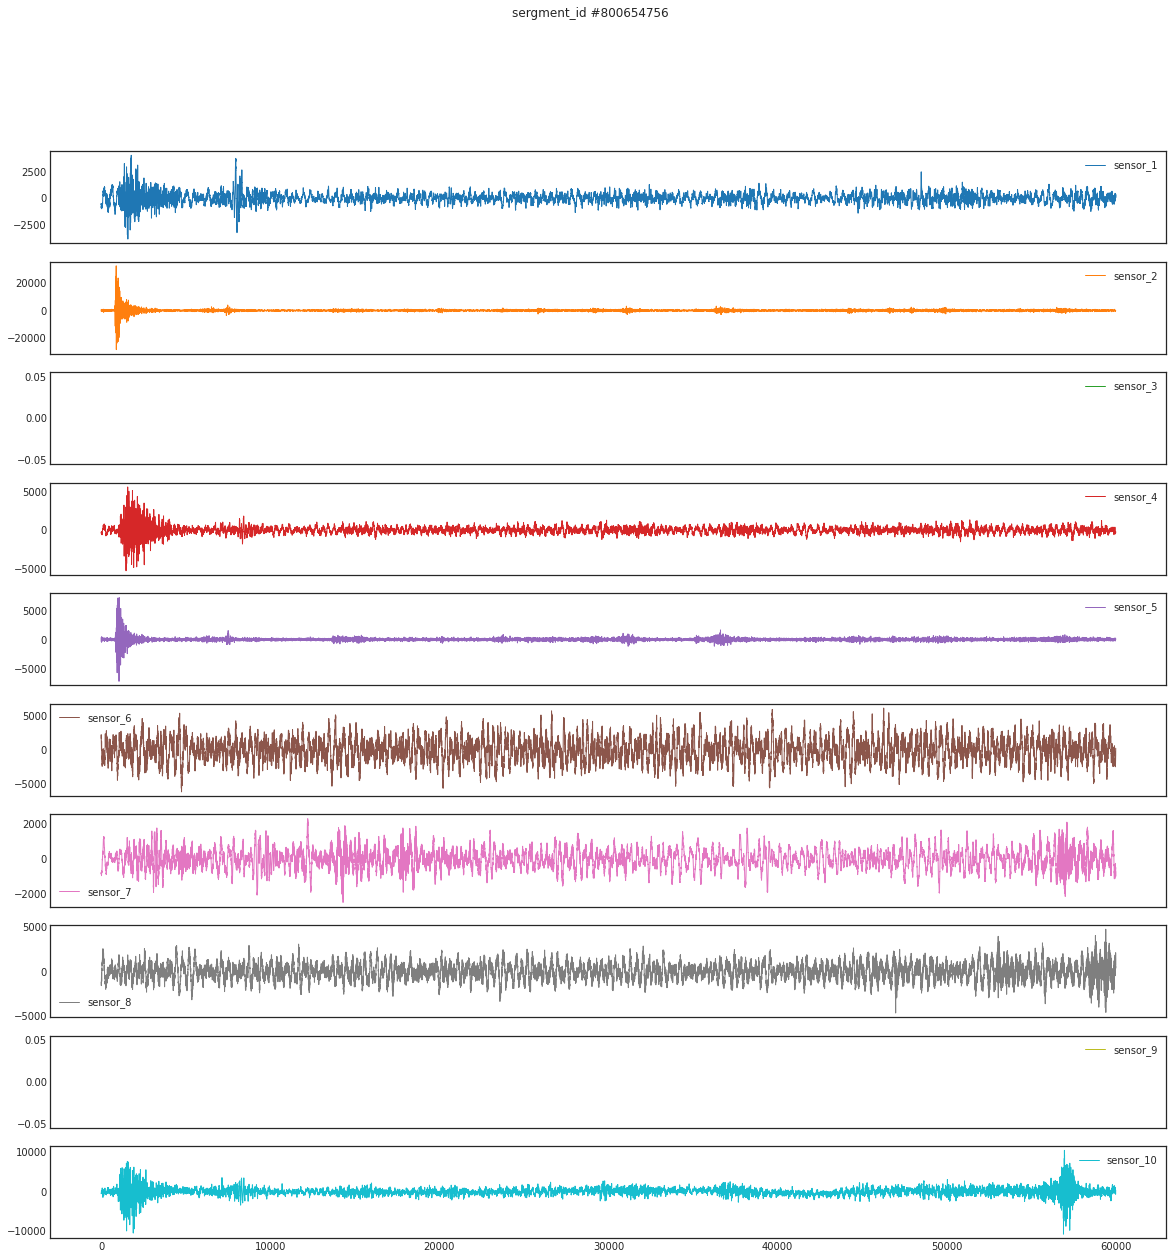

In [18]:
df_segment_id = pd.read_csv(PATH+'train/800654756.csv')

df_segment_id.plot(figsize=(20,20),
                  subplots=True,
                  layout=(10,1),
                  rot=0,
                  lw=1,
                  title='sergment_id #800654756')
plt.show()

In [19]:
display(train.sort_values('time_to_eruption', axis=0, ascending=True).iloc[[0,-1],:])

segment_id_min = 601524801
segment_id_max = 1923243961

df_segment_id_min = pd.read_csv(PATH+'train/'+str(segment_id_min)+'.csv')
df_segment_id_max = pd.read_csv(PATH+'train/'+str(segment_id_max)+'.csv')

,segment_id,time_to_eruption
590,601524801,6250
1139,1923243961,49046087


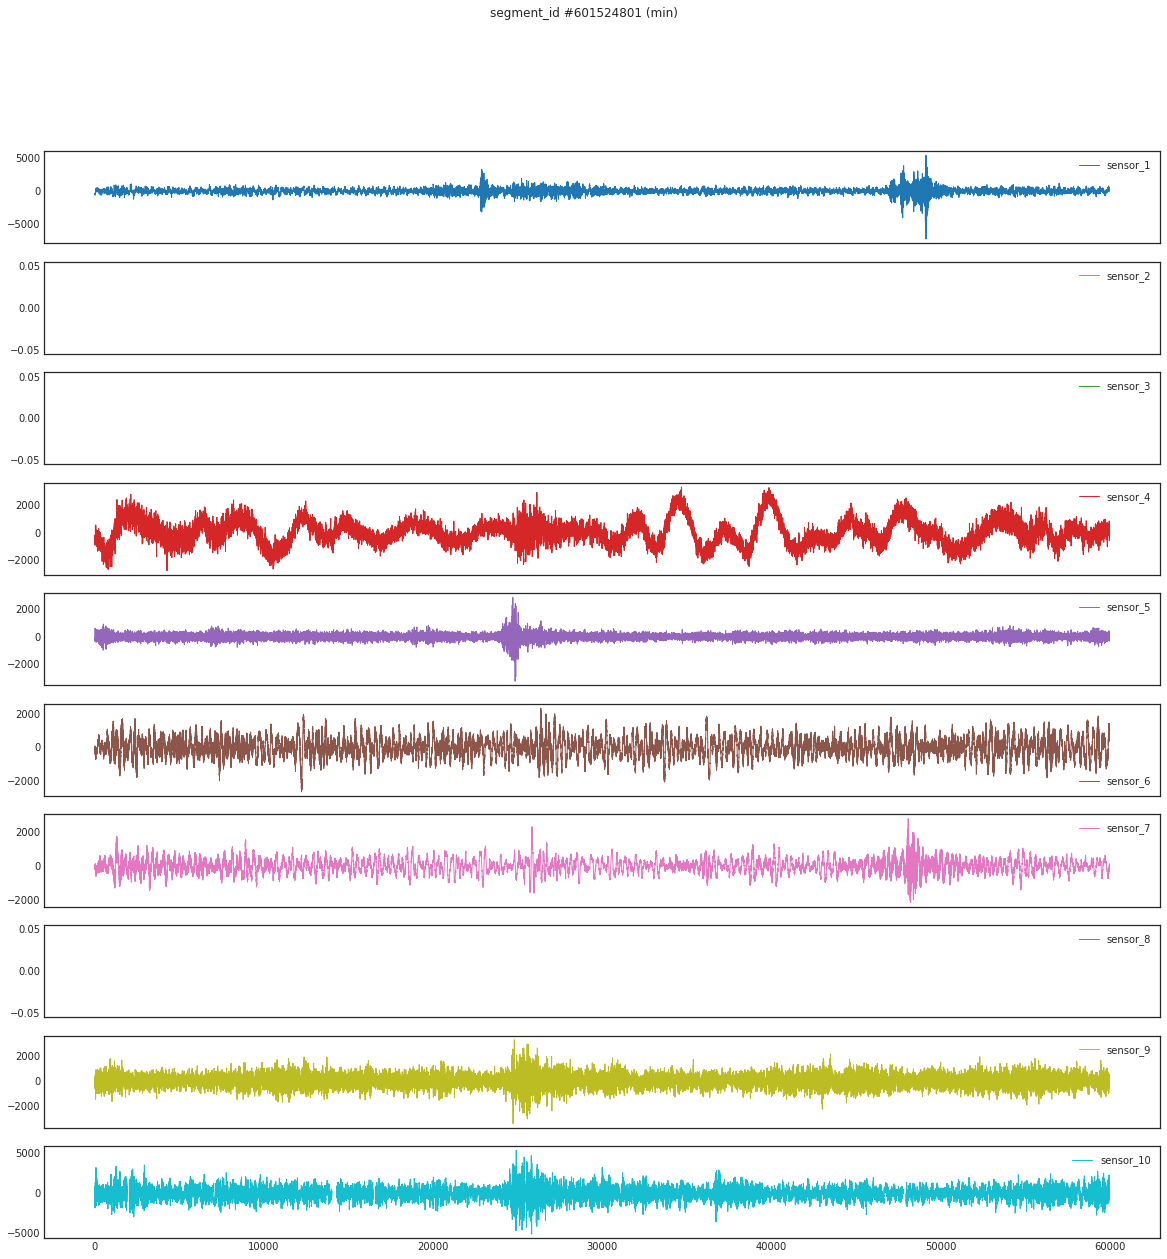

In [20]:
df_segment_id_min.plot(figsize=(20,20), subplots=True, layout=(10,1), rot=0, lw=1, title='segment_id #601524801 (min)')
plt.show()


Visually show how to match the minimum and maximum hours.

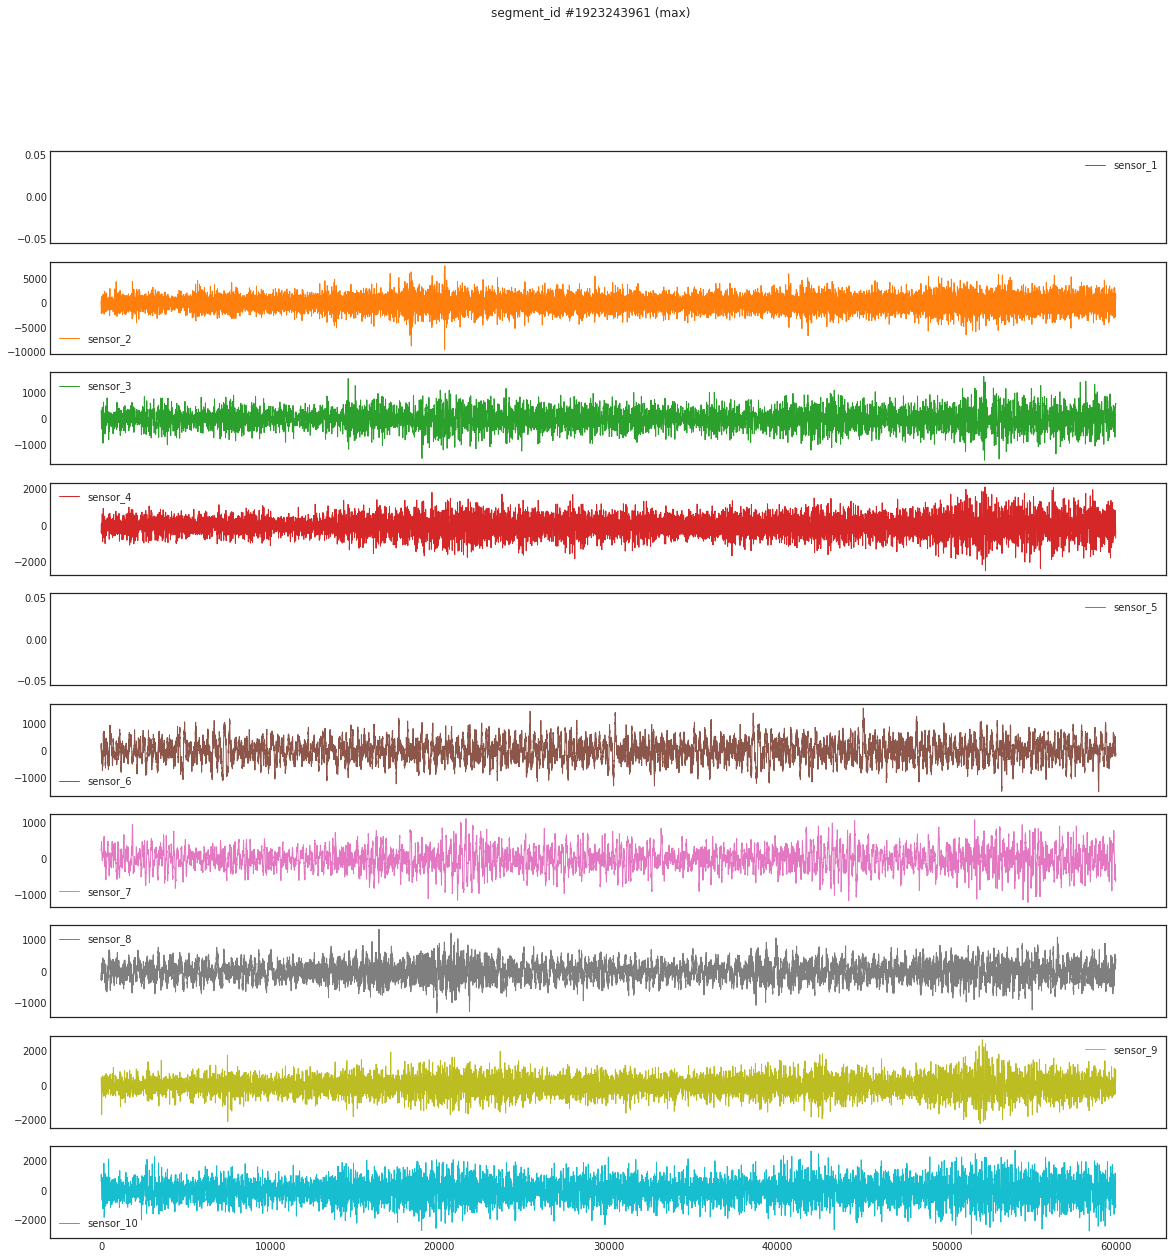

In [21]:
df_segment_id_max.plot(figsize=(20,20), subplots=True, layout=(10,1), rot=0, lw=1, title='segment_id #1923243961 (max)')
plt.show()

In [22]:
def build_features(signal, ts, sensor_id):
    X = pd.DataFrame()
    f = np.fft.fft(signal)
    f_real = np.real(f)
    X.loc[ts, f'{sensor_id}_sum'] = signal.sum()
    X.loc[ts, f'{sensor_id}_mean'] = signal.mean()
    X.loc[ts, f'{sensor_id}_std'] = signal.std()
    X.loc[ts, f'{sensor_id}_var'] = signal.var()
    X.loc[ts, f'{sensor_id}_max'] = signal.max()
    X.loc[ts, f'{sensor_id}_min'] = signal.min()
    X.loc[ts, f'{sensor_id}_skew'] = signal.skew()
    X.loc[ts, f'{sensor_id}_mad'] = signal.mad()
    X.loc[ts, f'{sensor_id}_kurtosis'] = signal.kurtosis()
    X.loc[ts, f'{sensor_id}_quantile99'] = np.quantile(signal, 0.99)
    X.loc[ts, f'{sensor_id}_quantile95'] = np.quantile(signal, 0.95)
    X.loc[ts, f'{sensor_id}_quantile85'] = np.quantile(signal, 0.85)
    X.loc[ts, f'{sensor_id}_quantile75'] = np.quantile(signal, 0.75)
    X.loc[ts, f'{sensor_id}_quantile55'] = np.quantile(signal, 0.55)
    X.loc[ts, f'{sensor_id}_quantile45'] = np.quantile(signal, 0.45)
    X.loc[ts, f'{sensor_id}_quantile25'] = np.quantile(signal, 0.25)
    X.loc[ts, f'{sensor_id}_quantile15'] = np.quantile(signal, 0.15)
    X.loc[ts, f'{sensor_id}_quantile05'] = np.quantile(signal, 0.05)
    X.loc[ts, f'{sensor_id}_quantile01'] = np.quantile(signal, 0.01)
    X.loc[ts, f'{sensor_id}_fft_real_mean'] = f_real.mean()
    X.loc[ts, f'{sensor_id}_fft_real_std'] = f_real.std()
    X.loc[ts, f'{sensor_id}_fft_real_max'] = f_real.max()
    X.loc[ts, f'{sensor_id}_fft_real_min'] = f_real.min()
    
    return X

In [23]:
train_set = list()
seg = 0

for seg, segment_id in enumerate(train.segment_id):
    signals = pd.read_csv(PATH+'train/'+str(segment_id)+'.csv')
    train_row = []
    
    if seg%200 == 0:
        print('Processing segment_id={}'.format(seg))
        
    for sensor in range(0, 10):
        sensor_id = f'sensor_{sensor+1}'
        train_row.append(build_features(signals[sensor_id].fillna(0), segment_id, sensor_id))
        
    train_row = pd.concat(train_row, axis=1)
    train_set.append(train_row)
    seg+=1
    
train_set = pd.concat(train_set)

Processing segment_id=0
Processing segment_id=200
Processing segment_id=400
Processing segment_id=600
Processing segment_id=800
Processing segment_id=1000
Processing segment_id=1200
Processing segment_id=1400
Processing segment_id=1600
Processing segment_id=1800
Processing segment_id=2000
Processing segment_id=2200
Processing segment_id=2400
Processing segment_id=2600
Processing segment_id=2800
Processing segment_id=3000
Processing segment_id=3200
Processing segment_id=3400
Processing segment_id=3600
Processing segment_id=3800
Processing segment_id=4000
Processing segment_id=4200
Processing segment_id=4400


In [24]:
train_set = train_set.reset_index()
train_set = train_set.rename(columns={'index':  'segment_id'})

train_set = pd.merge(train_set, train, on='segment_id')

In [25]:
print(train_set.head(3))

   segment_id  sensor_1_sum  sensor_1_mean  sensor_1_std   sensor_1_var  \
0  1136037770      -96621.0      -1.610323    303.096099   91867.245099   
1  1969647810       85569.0       1.426126    438.360560  192159.980413   
2  1895879680      150278.0       2.504592    241.575415   58358.681050   

   sensor_1_max  sensor_1_min  sensor_1_skew  sensor_1_mad  sensor_1_kurtosis  \
0        1353.0       -1421.0      -0.057494    238.836278           0.247736   
1        2197.0       -2005.0      -0.001189    334.894305           1.177624   
2        1148.0       -1115.0       0.071632    189.198970           0.567813   

   ...  sensor_10_quantile45  sensor_10_quantile25  sensor_10_quantile15  \
0  ...                 -77.0                -406.0                -616.0   
1  ...                -101.0                -547.0                -864.0   
2  ...                 -59.0                -323.0                -497.0   

   sensor_10_quantile05  sensor_10_quantile01  sensor_10_fft_real_mea

In [26]:
test_files = []
for dirname, _, filenames in os.walk(PATH+'test/'):
    for filename in filenames:
        test_files.append(filename[:-4])
        
test = pd.DataFrame(test_files, columns=['segment_id'])

In [27]:
test_set = list()
seg = 0

for seg, segment_id in enumerate(test.segment_id):
    signals = pd.read_csv(PATH+'test/'+str(segment_id)+'.csv')
    test_row = []
    
    if seg%200 == 0:
        print('Processing segment_id={}'.format(seg))
        
    for sensor in range(0, 10):
        sensor_id = f'sensor_{sensor+1}'
        test_row.append(build_features(signals[sensor_id].fillna(0), segment_id, sensor_id))
        
    test_row = pd.concat(test_row, axis=1)
    test_set.append(test_row)
    seg+=1
    
test_set = pd.concat(test_set)

Processing segment_id=0
Processing segment_id=200
Processing segment_id=400
Processing segment_id=600
Processing segment_id=800
Processing segment_id=1000
Processing segment_id=1200
Processing segment_id=1400
Processing segment_id=1600
Processing segment_id=1800
Processing segment_id=2000
Processing segment_id=2200
Processing segment_id=2400
Processing segment_id=2600
Processing segment_id=2800
Processing segment_id=3000
Processing segment_id=3200
Processing segment_id=3400
Processing segment_id=3600
Processing segment_id=3800
Processing segment_id=4000
Processing segment_id=4200
Processing segment_id=4400


In [28]:
test_set = test_set.reset_index()
test_set = test_set.rename(columns={'index':  'segment_id'})

test_set = pd.merge(test_set, test, on='segment_id')

In [29]:
print(test_set.head(3))

   segment_id  sensor_1_sum  sensor_1_mean  sensor_1_std   sensor_1_var  \
0   473253715      176053.0       2.934168    469.553705  220480.682099   
1   698018079     -163264.0      -2.721021    324.254991  105141.299153   
2  1102809614      -61271.0      -1.021166    187.078093   34998.213019   

   sensor_1_max  sensor_1_min  sensor_1_skew  sensor_1_mad  sensor_1_kurtosis  \
0        1768.0       -2035.0       0.008376    371.762610           0.170257   
1        1884.0       -2101.0      -0.075053    250.818417           1.160786   
2         811.0        -830.0      -0.048817    147.487040           0.256339   

   ...  sensor_10_quantile55  sensor_10_quantile45  sensor_10_quantile25  \
0  ...                  96.0                 -98.0                -536.0   
1  ...                  69.0                 -70.0                -392.0   
2  ...                   0.0                   0.0                   0.0   

   sensor_10_quantile15  sensor_10_quantile05  sensor_10_quantile01  

In [30]:
X = train_set.drop(['segment_id', 'time_to_eruption'], axis=1)
y = train_set['time_to_eruption']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.2,
                                                      random_state=42)

In [31]:
print(X_train.head(3))
print('np.shape(X_train) = ', np.shape(X_train))

      sensor_1_sum  sensor_1_mean  sensor_1_std   sensor_1_var  sensor_1_max  \
1345      223768.0       3.729405    183.976962   33847.522577        1113.0   
3130     -115501.0      -1.924985    481.973341  232298.301089        2880.0   
4062      -76366.0      -1.272745    406.212407  165008.519825        1721.0   

      sensor_1_min  sensor_1_skew  sensor_1_mad  sensor_1_kurtosis  \
1345        -895.0       0.127015    141.489283           1.192900   
3130       -2757.0      -0.014659    378.111685           0.611876   
4062       -1579.0       0.052022    322.913903           0.102883   

      sensor_1_quantile99  ...  sensor_10_quantile55  sensor_10_quantile45  \
1345                475.0  ...                  49.0                 -48.0   
3130               1133.0  ...                 109.0                -116.0   
4062                968.0  ...                 103.0                 -99.0   

      sensor_10_quantile25  sensor_10_quantile15  sensor_10_quantile05  \
1345       

In [32]:
print(y_train.head(3))
print('np.shape(y_train) = ', np.shape(y_train))

1345    29684540
3130    40625627
4062    44259173
Name: time_to_eruption, dtype: int64
np.shape(y_train) =  (3544,)


In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=20, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [34]:
y_pred = model.predict(X_valid)

Text(0.5, 1.0, 'Nonlinear Regression')

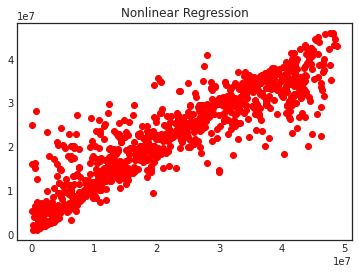

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_valid, y_pred)
fig = plt.figure()
mulreg = fig.add_subplot(1, 1, 1)
mulreg.scatter(y_valid, y_pred, color='r')
mulreg.set_title('Nonlinear Regression')

In [36]:
prediction = model.predict(test_set.drop(columns=['segment_id']))

In [37]:
submission = pd.DataFrame()  
submission['segment_id'] = test_set['segment_id']
submission['time_to_eruption'] = prediction
submission.to_csv('submission.csv', header=True, index=False)

In [38]:
keys = list(pd.read_csv(file_list_test[0]).keys()) 
print(keys)
nanC = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for index in range(len(file_list_test)):
    df = pd.read_csv(file_list_test[index]) 
    for key in df.keys():
        if df[key].isna().sum() == len(pd.read_csv(file_list_train[0])):      
            nanC[keys.index(key)] += 1

print(nanC)
data={'sensors': keys, 'count': nanC}
NaNDF = pd.DataFrame(data)
print(NaNDF)

['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10']
[387, 1257, 434, 0, 1388, 0, 34, 294, 817, 760]
     sensors  count
0   sensor_1    387
1   sensor_2   1257
2   sensor_3    434
3   sensor_4      0
4   sensor_5   1388
5   sensor_6      0
6   sensor_7     34
7   sensor_8    294
8   sensor_9    817
9  sensor_10    760


<AxesSubplot:xlabel='sensors'>

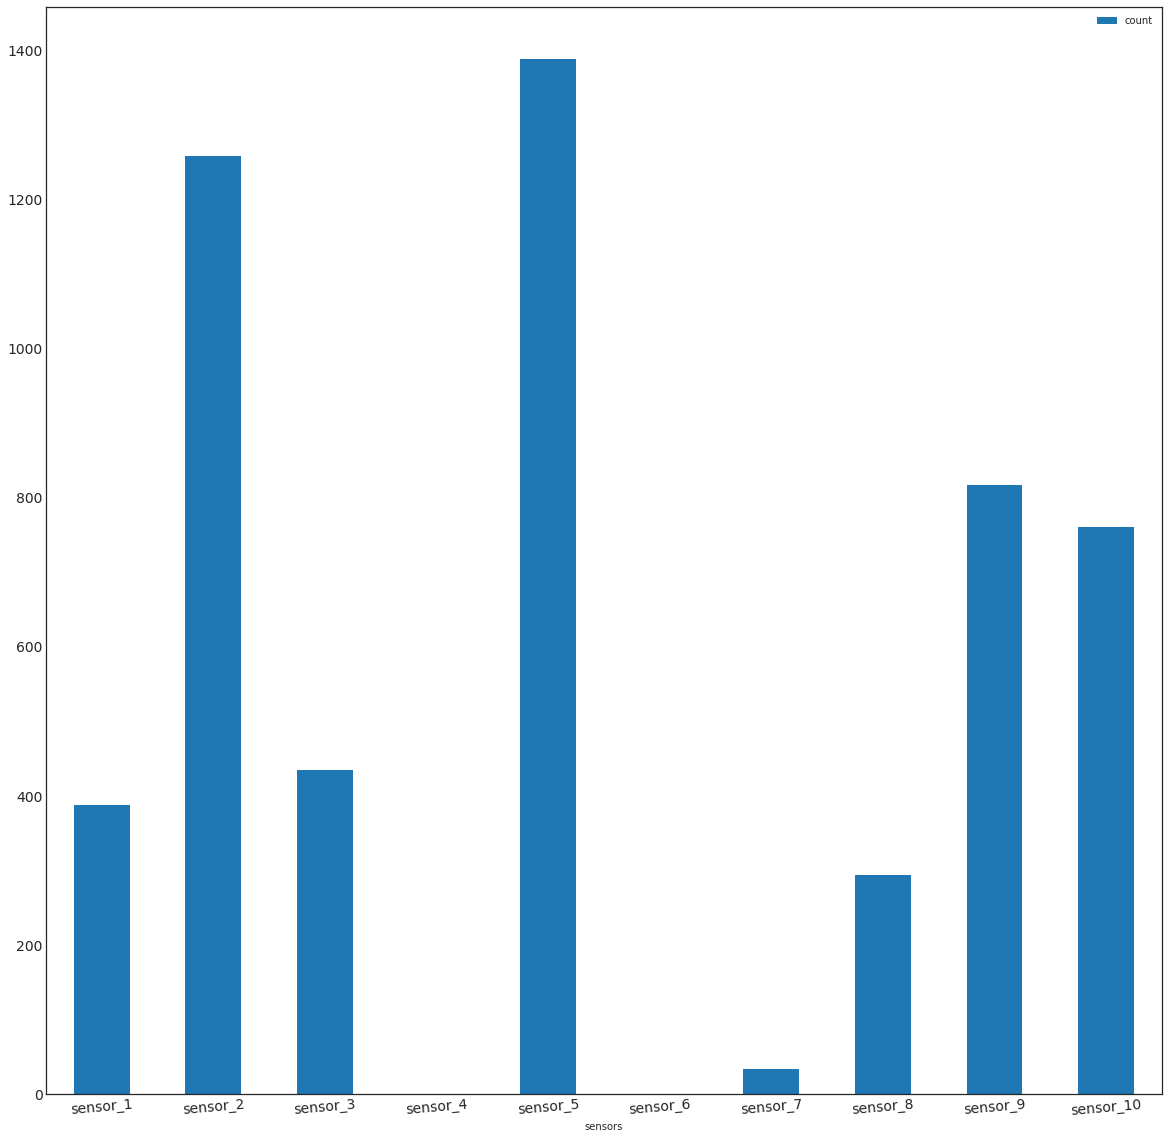

In [39]:
NaNDF.plot(figsize =(20, 20), x="sensors", y="count", kind="bar",  rot=5, fontsize=14 )